In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [188]:
dataset = pd.read_csv('/Users/haileybae/Downloads/MELBOURNE_housing_FULL.csv')
#source: https://www.kaggle.com/datasets/anthonypino/melbourne-housing-market

In [189]:
dataset.info()

""" Suburb: Suburb
Address: Address
Rooms: Number of rooms
Price: Price in Australian dollars
Method: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed;
 SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; 
 SS - sold after auction price not disclosed. N/A - price or highest bid not available.
Type: br - bedroom(s); h - house, cottage, villa, semi, terrace; u - unit, duplex; t - townhouse; 
    dev site - development site; o res - other residential.
SellerG: Real Estate Agent
Date: Date sold
Distance: Distance from CBD (Central Business District) in Kilometers
Regionname: General Region (West, North West, North, North east ...etc)
Propertycount: Number of properties that exist in the suburb
Bedroom2 : Scraped # of Bedrooms (from different source)
Bathroom: Number of Bathrooms
Car: Number of carspots
Landsize: Land Size in Metres
BuildingArea: Building Size in Metres
YearBuilt: Year the house was built
CouncilArea: Governing council for the area
Lattitude: Self explanitory
Longtitude: Self explanitory """


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

' Suburb: Suburb\nAddress: Address\nRooms: Number of rooms\nPrice: Price in Australian dollars\nMethod: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed;\n SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; \n SS - sold after auction price not disclosed. N/A - price or highest bid not available.\nType: br - bedroom(s); h - house, cottage, villa, semi, terrace; u - unit, duplex; t - townhouse; \n    dev site - development site; o res - other residential.\nSellerG: Real Estate Agent\nDate: Date sold\nDistance: Distance from CBD (Central Business District) in Kilometers\nRegionname: General Region (West, North West, North, North east ...etc)\nPropertycount: Number of properties that exist in the suburb\nBedroom2 : Scraped # of Bedrooms (from different source)\nBathroom: Number of Bathrooms\nCar: Number of carspots\nLandsize: Land Size in Metres\nBuildingArea: Building Size in Me

In [190]:
# Find any duplicate rows 
dataset[dataset.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
15858,Nunawading,1/7 Lilian St,3,t,NaN,SP,Jellis,17/06/2017,15.4,3131.0,...,3.0,2.0,405.0,226.0,2000.0,Manningham City Council,-37.82678,145.16777,Eastern Metropolitan,4973.0


In [191]:
# Remove duplicate rows
dataset.drop_duplicates(inplace=True)

In [192]:
print(dataset.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [193]:
#Conver object columns into categorical/ date datatypes
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname']
for a in obj_cats: 
    dataset[a] = dataset[a].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34856 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34856 non-null  category
 1   Address        34856 non-null  category
 2   Rooms          34856 non-null  int64   
 3   Type           34856 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34856 non-null  category
 6   SellerG        34856 non-null  category
 7   Date           34856 non-null  category
 8   Distance       34855 non-null  float64 
 9   Postcode       34855 non-null  float64 
 10  Bedroom2       26639 non-null  float64 
 11  Bathroom       26630 non-null  float64 
 12  Car            26128 non-null  float64 
 13  Landsize       23046 non-null  float64 
 14  BuildingArea   13741 non-null  float64 
 15  YearBuilt      15550 non-null  float64 
 16  CouncilArea    34853 non-null  category
 17  Lattitude      26880 non-null  float

In [194]:
# For each column, identify # of rows with missing values

dataset.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [195]:
#Percentage of missing values 

dataset.isnull().sum()/len(dataset)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.829814
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.574134
Bathroom         23.599954
Car              25.040165
Landsize         33.882258
BuildingArea     60.577806
YearBuilt        55.387882
CouncilArea       0.008607
Lattitude        22.882717
Longtitude       22.882717
Regionname        0.008607
Propertycount     0.008607
dtype: float64

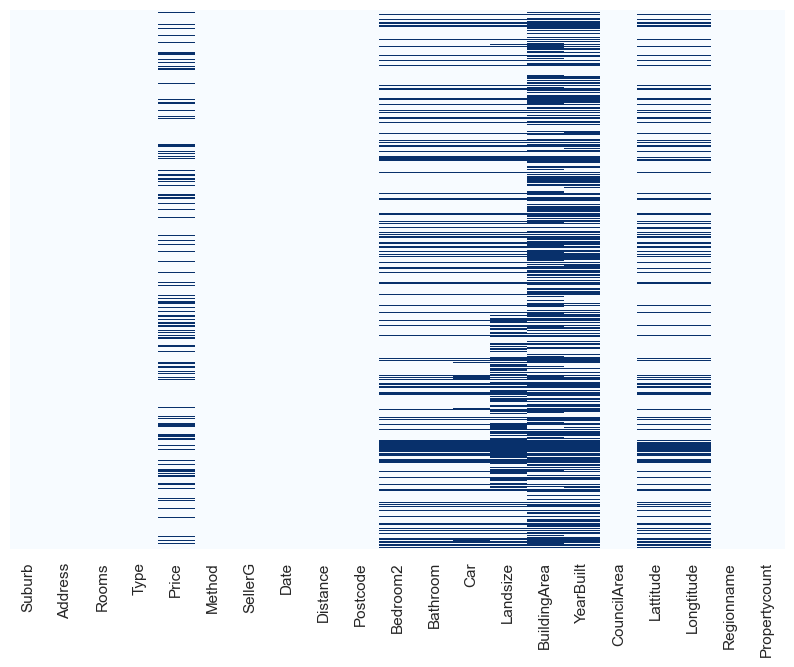

In [196]:
#Visualize missing values

plt.figure(figsize=(10, 7))
sns.set(font_scale=1)

# Generate the heatmap for missing values
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap='Blues')

# Show the heatmap
plt.show()

In [197]:
#Remove columns where >55% rows are missing values: BuildingArea, Year Built

dataset.drop("BuildingArea",axis=1,inplace=True)
dataset.drop("YearBuilt",axis=1,inplace=True)

#Remove rows where price (target variable) is missing values
dataset.dropna(axis=0, subset="Price", inplace=True)

dataset.info()
dataset.isnull().sum()/len(dataset)*100


<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  int64   
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  float64 
 10  Bedroom2       20806 non-null  float64 
 11  Bathroom       20800 non-null  float64 
 12  Car            20423 non-null  float64 
 13  Landsize       17982 non-null  float64 
 14  CouncilArea    27244 non-null  category
 15  Lattitude      20993 non-null  float64 
 16  Longtitude     20993 non-null  float64 
 17  Regionname     27244 non-null  categ

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.003670
Postcode          0.003670
Bedroom2         23.639300
Bathroom         23.661321
Car              25.044959
Landsize         34.003744
CouncilArea       0.011010
Lattitude        22.952986
Longtitude       22.952986
Regionname        0.011010
Propertycount     0.011010
dtype: float64

In [198]:
#check whether Rooms and Bedroom2 are duplicates
dataset.duplicated(subset=["Bedroom2", "Rooms"]).sum()/len(dataset)*100

99.78713252835175

In [199]:
#Since >99% of the rows are duplicates, drop Bedroom2
dataset.drop("Bedroom2",axis=1,inplace=True)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 1 to 34856
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27247 non-null  category
 1   Address        27247 non-null  category
 2   Rooms          27247 non-null  int64   
 3   Type           27247 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         27247 non-null  category
 6   SellerG        27247 non-null  category
 7   Date           27247 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  float64 
 10  Bathroom       20800 non-null  float64 
 11  Car            20423 non-null  float64 
 12  Landsize       17982 non-null  float64 
 13  CouncilArea    27244 non-null  category
 14  Lattitude      20993 non-null  float64 
 15  Longtitude     20993 non-null  float64 
 16  Regionname     27244 non-null  category
 17  Propertycount  27244 non-null  float

In [200]:
#Start imputing values
#1) Lat and Long can be looked up using the address & zip code in OpenMap API 
#First convert the datatype so the values are displayed appropriately

dataset = dataset.dropna(subset=['Postcode'])
dataset['Postcode'] = dataset['Postcode'].astype(int).astype(str).str.zfill(5)
dataset["Postcode"]

1        03067
2        03067
4        03067
5        03067
6        03067
         ...  
34852    03013
34853    03013
34854    03013
34855    03013
34856    03013
Name: Postcode, Length: 27246, dtype: object

In [201]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [202]:
 #Lat & Long: Replace based on house addresses using Google's API
from geopy.geocoders import GoogleV3
from geopy.exc import GeocoderTimedOut

# Replace 'your_api_key' with your actual Google API key
geolocator = GoogleV3(api_key='api key')
for index, row in dataset.iterrows():
    if  (pd.isnull(row['Lattitude'])) or (pd.isnull(row['Longtitude'])):
        address = f"{row['Address']}, {row['Postcode']}"
        try:
            location = geolocator.geocode(address)
            if location:
                dataset.at[index, 'Lattitude'] = location.latitude
                dataset.at[index, 'Longtitude'] = location.longitude
              #  print (address)
              #  print (location.latitude, location.longitude)
        except GeocoderTimedOut:
            print ("timedout") 

In [203]:
# 2) Impute Landsize (medians grouped by Rooms and Type)
median_landsize = dataset.groupby(['Rooms', 'Type'])['Landsize'].median().reset_index()
median_landsize.columns = ['Rooms', 'Type', 'median_landsize']

dataset = dataset.merge(median_landsize, on=['Rooms', 'Type'], how='left')
dataset['Landsize'] = dataset['Landsize'].fillna(dataset['median_landsize'])
dataset.drop(columns=['median_landsize'], inplace=True)

# 3) Impute bathroom (medians grouped by Rooms)
median_bathroom = dataset.groupby(['Rooms'])['Bathroom'].median().reset_index()
median_bathroom.columns = ['Rooms', 'median_bathroom']

dataset = dataset.merge(median_bathroom, on=['Rooms'], how='left')
dataset['Bathroom'] = dataset['Bathroom'].fillna(dataset['median_bathroom'])
dataset.drop(columns=['median_bathroom'], inplace=True)

# 4) Impute Car (e.g. # of garage spaces) 
dataset['Car'].fillna(dataset['Car'].median(),inplace=True)

# 5) Impute Propertycount
dataset['Propertycount'].fillna(dataset['Propertycount'].median(),inplace=True)

dataset.isnull().sum()
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27246 entries, 0 to 27245
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         27246 non-null  category
 1   Address        27246 non-null  category
 2   Rooms          27246 non-null  int64   
 3   Type           27246 non-null  category
 4   Price          27246 non-null  float64 
 5   Method         27246 non-null  category
 6   SellerG        27246 non-null  category
 7   Date           27246 non-null  category
 8   Distance       27246 non-null  float64 
 9   Postcode       27246 non-null  object  
 10  Bathroom       27245 non-null  float64 
 11  Car            27246 non-null  float64 
 12  Landsize       27244 non-null  float64 
 13  CouncilArea    27244 non-null  category
 14  Lattitude      25302 non-null  float64 
 15  Longtitude     25302 non-null  float64 
 16  Regionname     27244 non-null  category
 17  Propertycount  27246 non-null  

/var/folders/vc/sdp2qmwd0mxdyydhn34f9mzc0000gn/T/ipykernel_86288/306488287.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_landsize = dataset.groupby(['Rooms', 'Type'])['Landsize'].median().reset_index()
/var/folders/vc/sdp2qmwd0mxdyydhn34f9mzc0000gn/T/ipykernel_86288/306488287.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



In [205]:
dataset.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            1
Car                 0
Landsize            2
CouncilArea         2
Lattitude        1944
Longtitude       1944
Regionname          2
Propertycount       0
dtype: int64

In [206]:
#remove rows where Lat & Long are null 
dataset = dataset.dropna(subset=['Lattitude','Longtitude'])

In [207]:
# Remove Address, CouncilArea, Regionname, Method, SellerG
dataset.drop("Address",axis=1,inplace=True)
dataset.drop("CouncilArea",axis=1,inplace=True)
dataset.drop("Regionname",axis=1,inplace=True)
dataset.drop("Method",axis=1,inplace=True)
dataset.drop("SellerG",axis=1,inplace=True)

In [208]:
# Identifying Outliers usign Z-score Method

numeric_columns = dataset.select_dtypes(['float64','int64'])
z_score_threshold = 3
mask = pd.Series(True, index=dataset.index)
list_columns = ['Rooms','Price','Distance','Bathroom', 'Car', 'Landsize', 'Propertycount']

for col in list_columns:
    z_scores = (dataset[col] - dataset[col].mean())/dataset[col].std()
    outliers = (z_scores < -z_score_threshold) | (z_scores > z_score_threshold)
    print("Outlier counts of column:", col, dataset[col][outliers].count())
    mask &= ~outliers
dataset = dataset[mask]
dataset.describe().transpose()


Outlier counts of column: Rooms 175
Outlier counts of column: Price 438
Outlier counts of column: Distance 595
Outlier counts of column: Bathroom 242
Outlier counts of column: Car 264
Outlier counts of column: Landsize 36
Outlier counts of column: Propertycount 698


,count,mean,std,min,25%,50%,75%,max
Rooms,23070.0,2.941439e+00,0.895170,1.000000,2.000000,3.000000,4.000000e+00,5.000000e+00
Price,23070.0,1.017984e+06,507927.799496,85000.000000,646000.000000,888000.000000,1.291000e+06,2.975000e+06
Distance,23070.0,1.068929e+01,5.757407,0.000000,6.300000,10.100000,1.390000e+01,3.160000e+01
Bathroom,23070.0,1.479931e+00,0.607016,0.000000,1.000000,1.000000,2.000000e+00,3.000000e+00
Car,23070.0,1.700000e+00,0.775248,0.000000,1.000000,2.000000,2.000000e+00,4.000000e+00
Landsize,23070.0,4.422721e+02,475.557696,0.000000,191.000000,448.000000,6.210000e+02,9.838000e+03
Lattitude,23070.0,-3.308820e+01,18.690407,-45.898862,-37.857800,-37.796100,-3.773976e+01,5.811726e+01
Longtitude,23070.0,1.327348e+02,50.556977,-157.863295,144.907581,144.997683,1.450673e+02,1.769154e+02
Propertycount,23070.0,7.129758e+03,3840.710876,121.000000,4217.000000,6482.000000,9.758000e+03,1.749600e+04


In [209]:
dataset.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Date             0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
Lattitude        0
Longtitude       0
Propertycount    0
dtype: int64

In [210]:
dataset.to_csv('cleaned_melbourne_housing.csv', index=False)

<Figure size 1600x700 with 0 Axes>

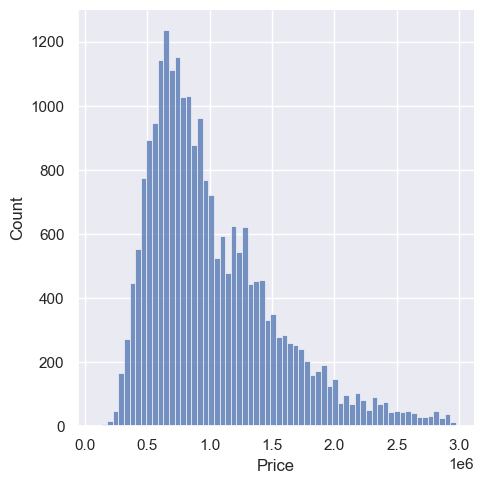

In [211]:
plt.figure(figsize=(16,7))
sns.displot(dataset['Price'],kde = False)

<Figure size 1600x700 with 0 Axes>

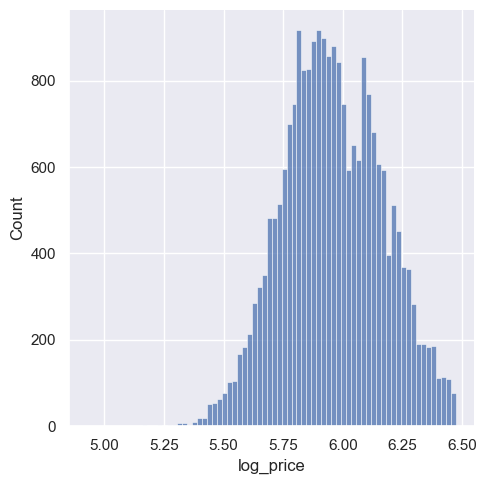

In [212]:
# Log transform the price variable to achieve a normal distribution 
#x = np.log10(dataset["Price"])
dataset["log_price"] = np.log10(dataset["Price"])
plt.figure(figsize=(16,7))
sns.displot(dataset["log_price"],kde = False)


(144.4, 145.5)

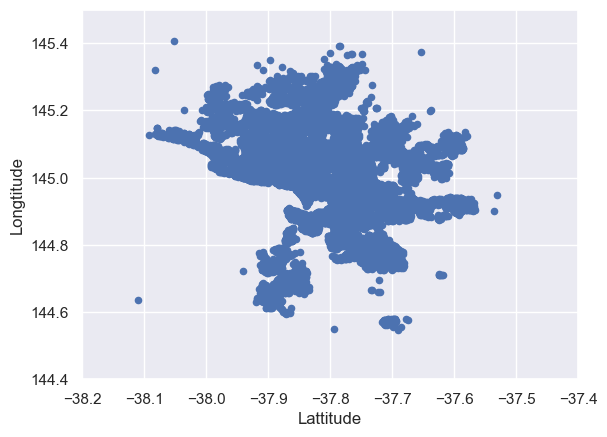

In [215]:
dataset.plot(kind='scatter', x='Lattitude', y='Longtitude')
plt.xlim(-38.2, -37.4)
plt.ylim(144.4, 145.5)

(144.4, 145.5)

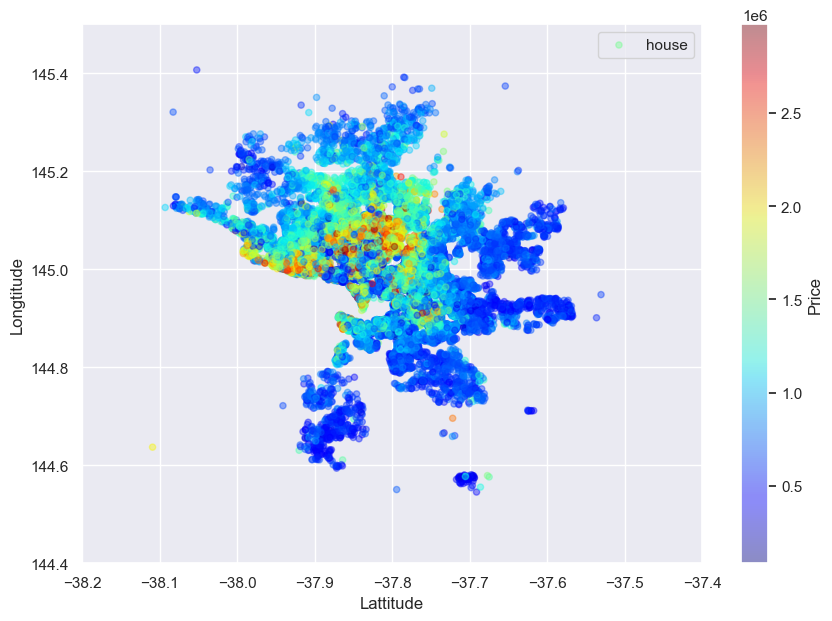

In [217]:
dataset.plot(kind='scatter', x='Lattitude', y='Longtitude',label = 'house', alpha=0.4,figsize=(10, 7),
            c='Price', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.xlim(-38.2, -37.4)
plt.ylim(144.4, 145.5)

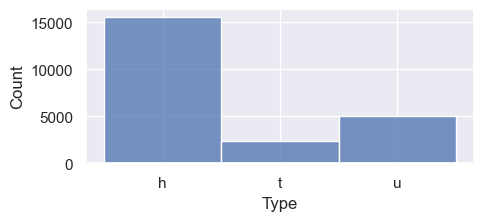

In [219]:
#categorical variable analysis ("Type")


plt.figure(figsize=(5, 2))
sns.histplot(dataset['Type'])
    

plt.show()

In [220]:
numeric_columns = dataset.select_dtypes(['float64','int64'])

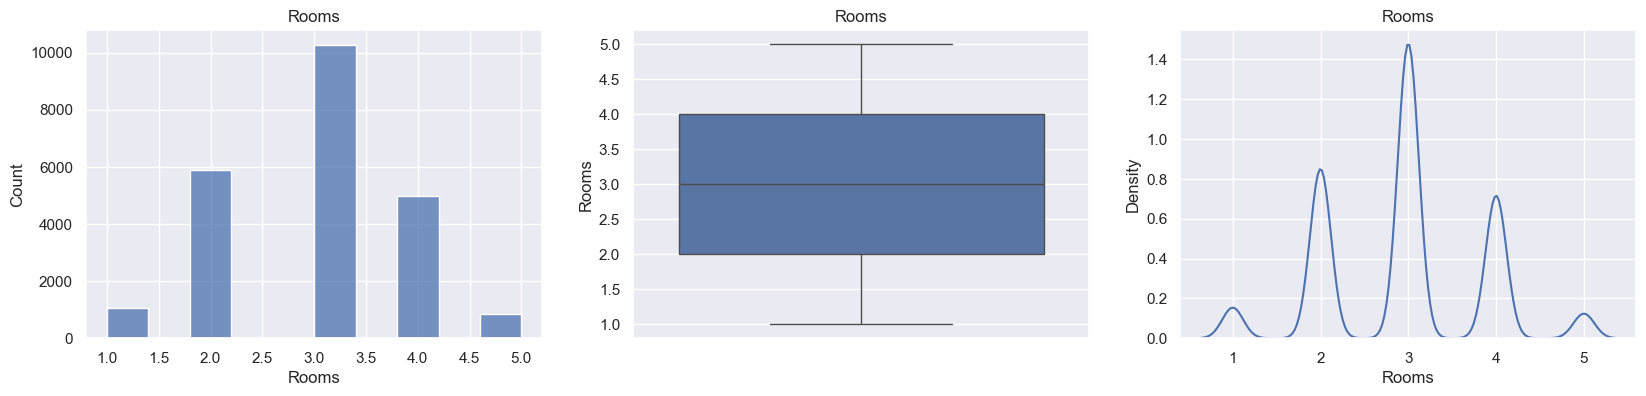

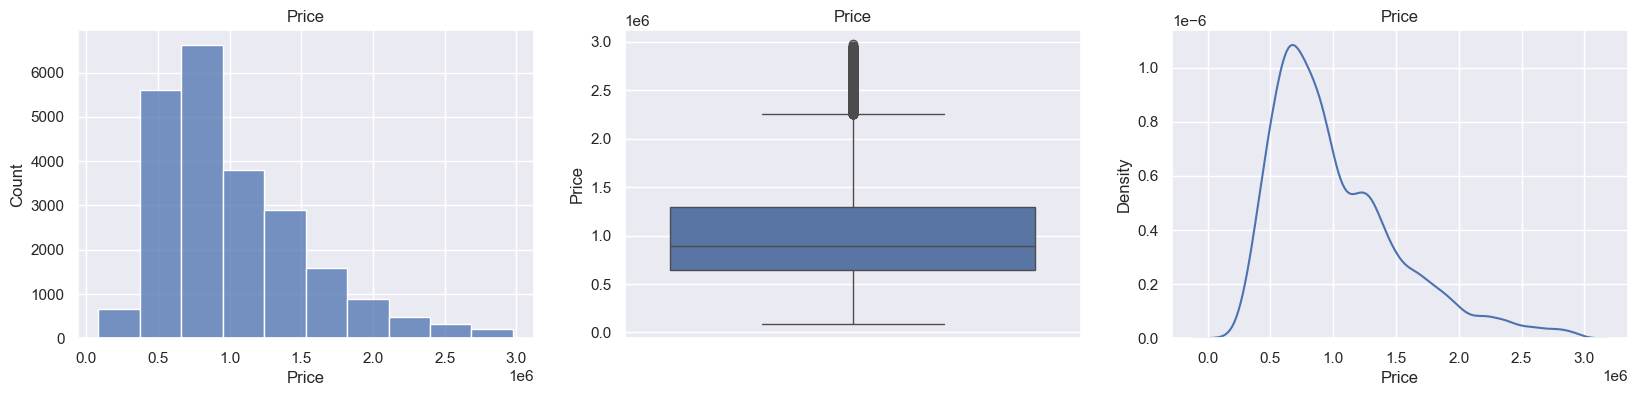

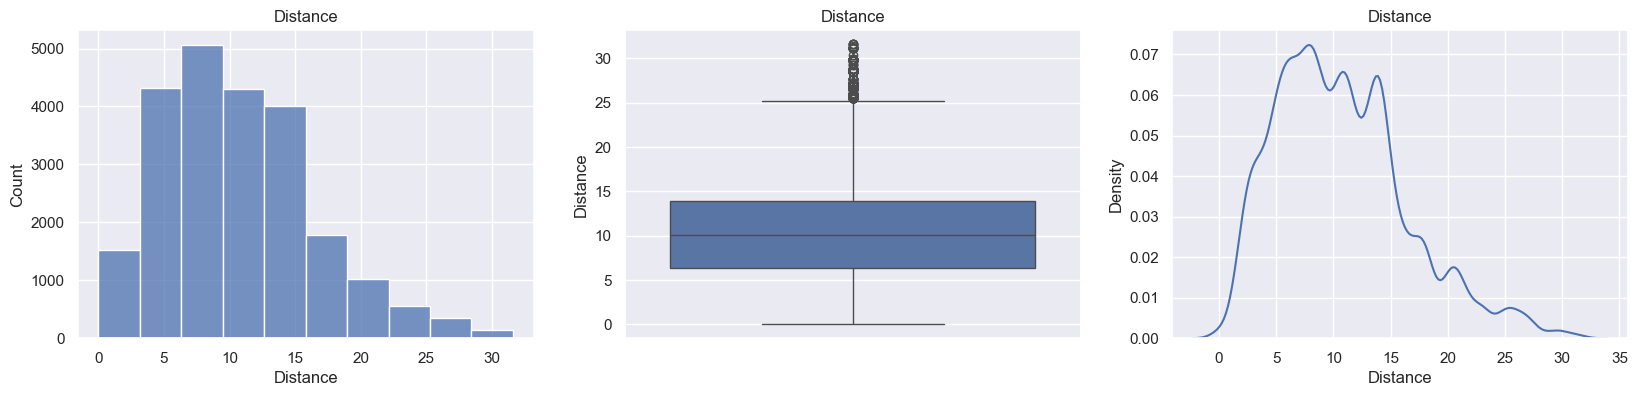

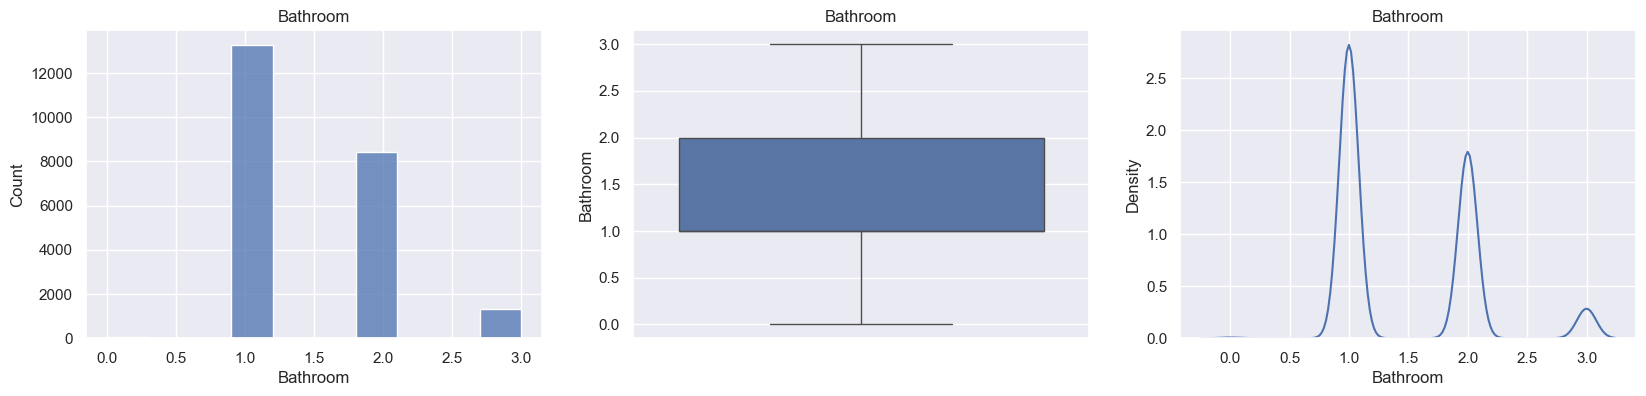

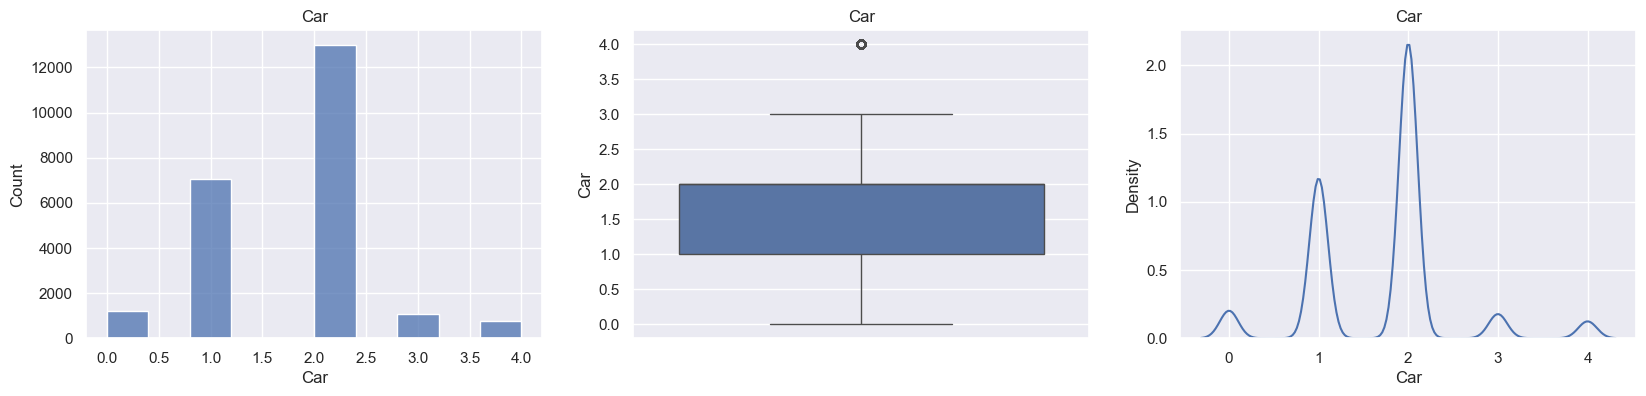

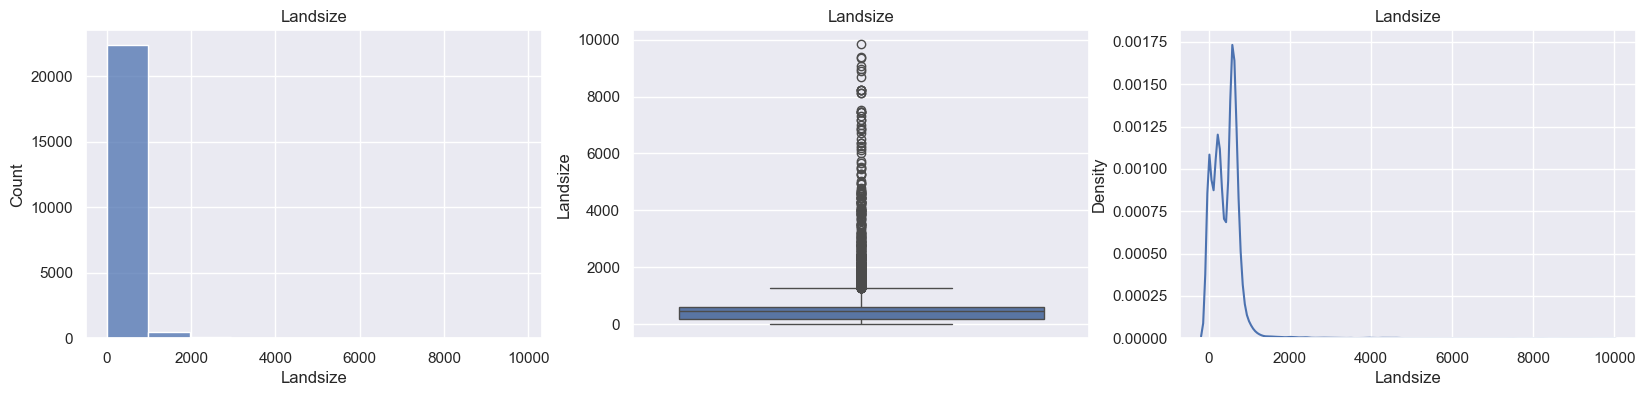

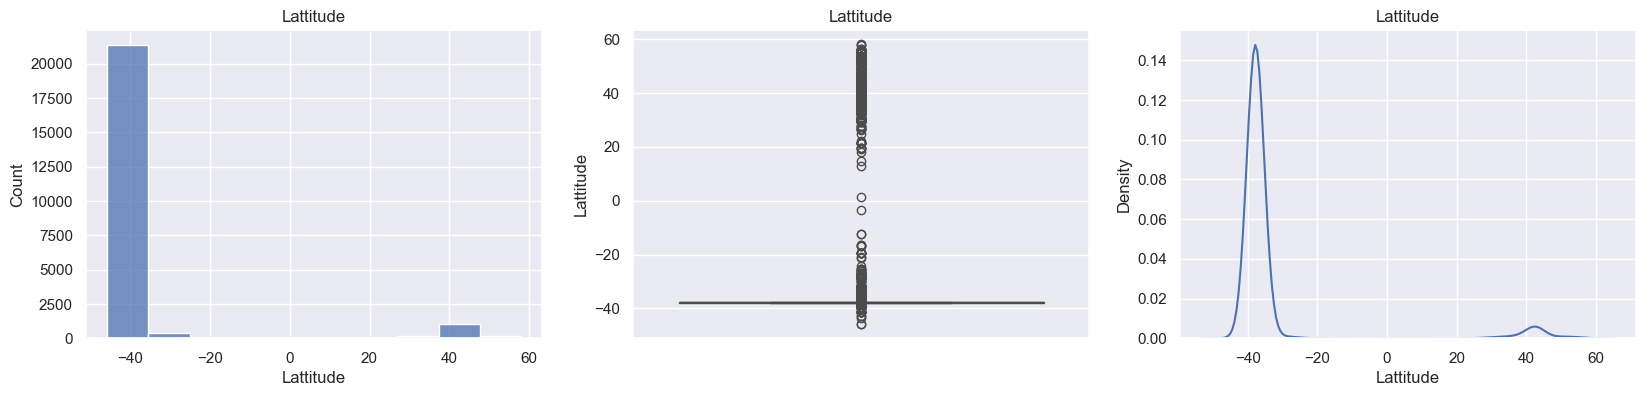

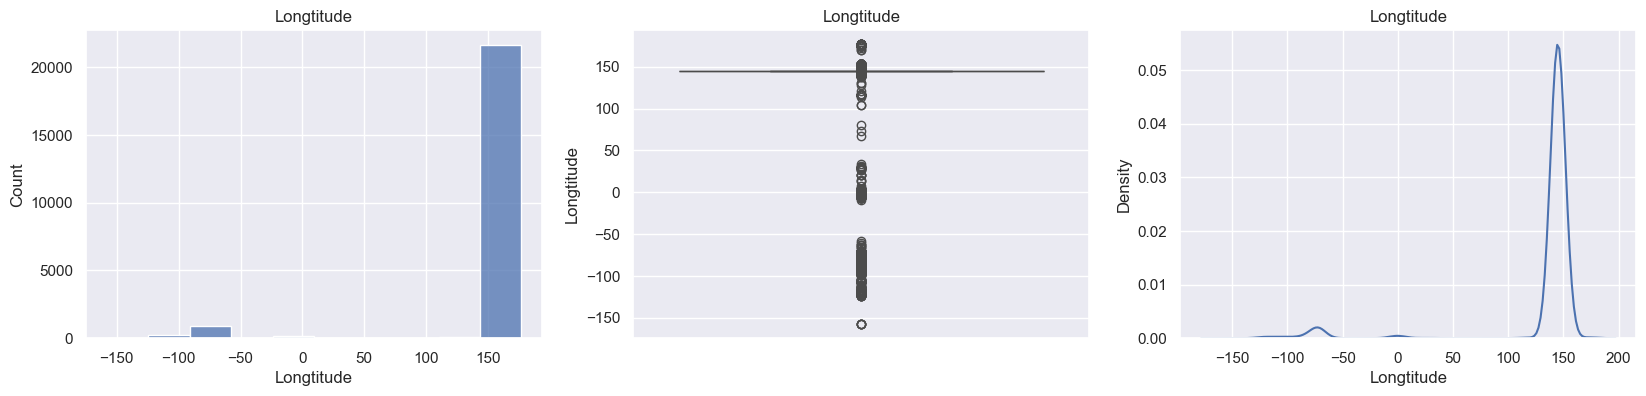

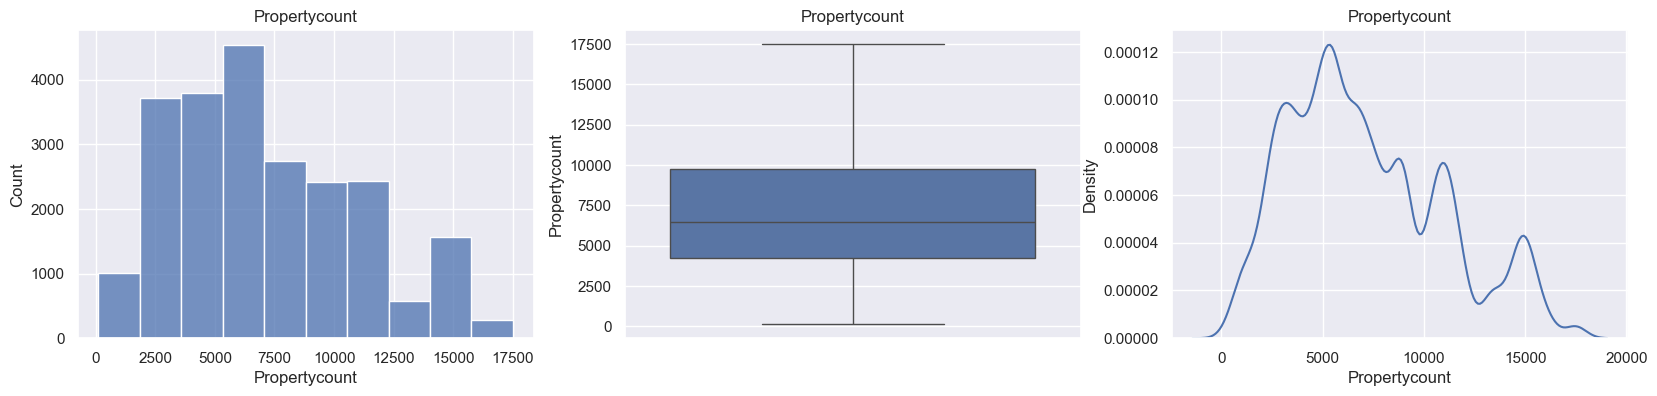

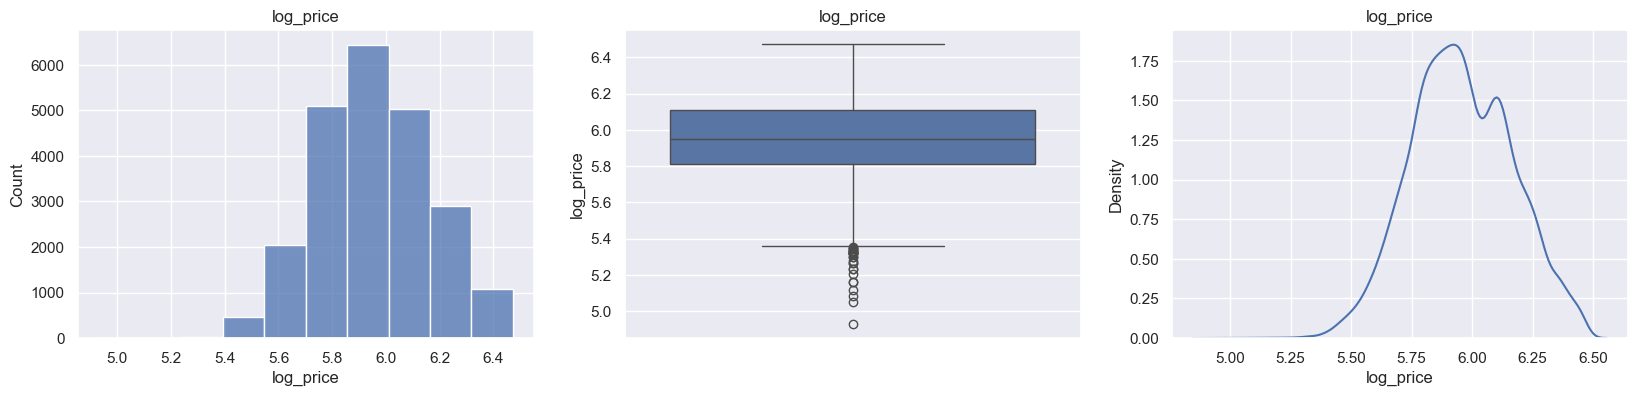

In [221]:
for i in numeric_columns:

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 4))
    sns.histplot(dataset[i], bins=10, ax=axes[0])
    axes[0].set_title(i)
    
    sns.boxplot(dataset[i], ax=axes[1])
    axes[1].set_title(i)
   
    sns.kdeplot(dataset[i], ax=axes[2])
    axes[2].set_title(i)
    plt.show()

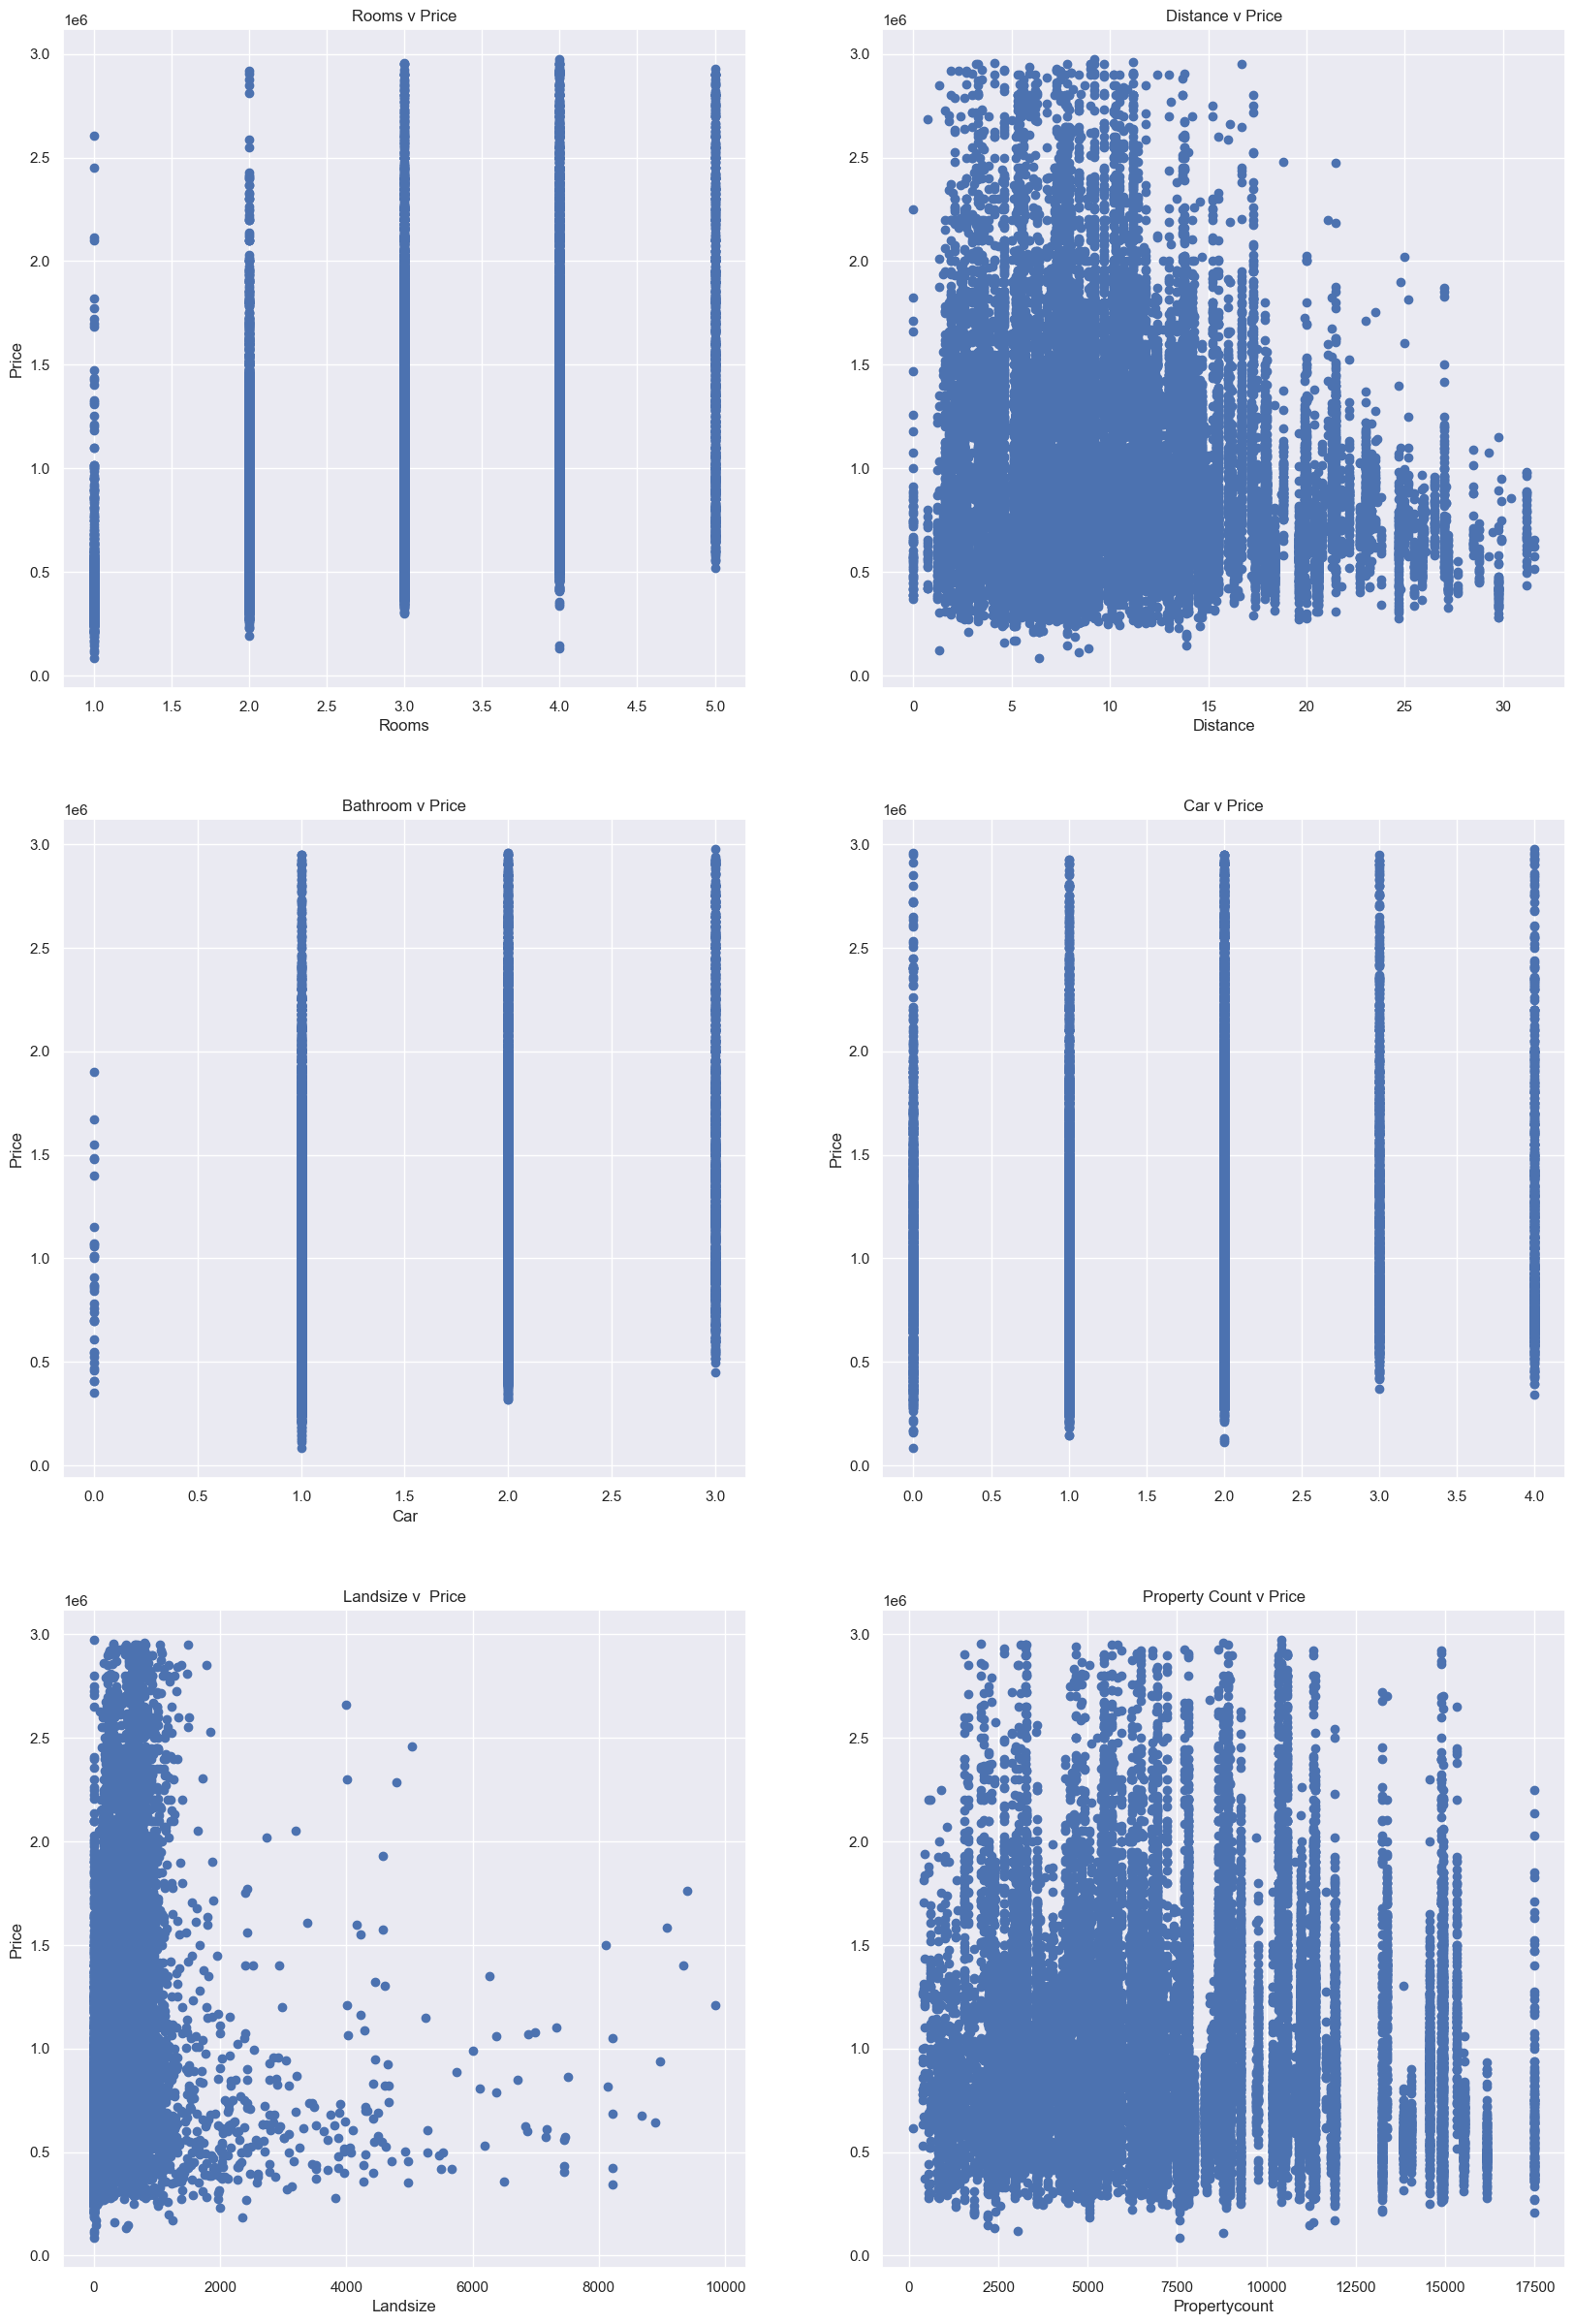

In [222]:

f, axes = plt.subplots(3,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [3,1]
axes[2,1].scatter(x = 'Propertycount', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[2,1].set_title('Property Count v Price')

plt.show()

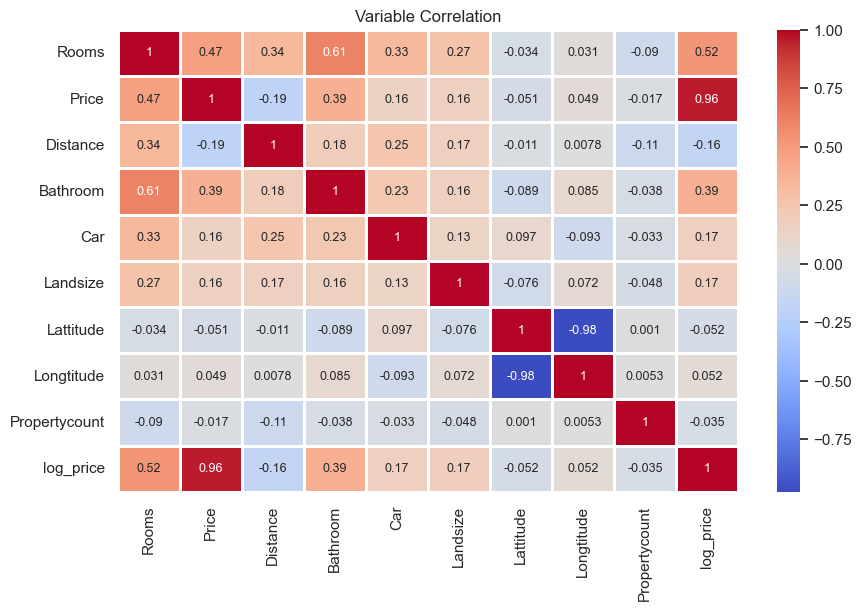

In [223]:
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_columns.corr(), cmap='coolwarm', linewidth=1, annot=True, annot_kws={"size": 9})
plt.title('Variable Correlation')
plt.show()

In [226]:
dataset.to_csv('cleaned_melbourne_housing.csv')  